In [3]:
print("hi")

hi


In [13]:

import os
import json
import shutil

# 🔹 Define paths
json_file = "/home/yash/Desktop/miccai2022_sisvse_dataset/instance_jsons/manual_syn.json"  # Update this
main_image_folder = "/home/yash/Desktop/miccai2022_sisvse_dataset/images/manual_syn"  # Update this
output_folder = "/home/yash/Desktop/project/manual_syn"  # Update this

# 🔹 Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# 🔹 Load JSON file
with open(json_file, "r") as f:
    data = json.load(f)

# 🔹 Extract filenames (assuming they are in "images" key)
image_filenames = [img["file_name"] for img in data["images"]]  # Adjust if JSON format is different

# 🔹 Copy matching images to the new folder
for filename in image_filenames:
    actual_filename = os.path.basename(filename)  # Remove "real/" prefix
    src_path = os.path.join(main_image_folder, actual_filename)
    dest_path = os.path.join(output_folder, actual_filename)

    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
        print(f"✅ Copied: {actual_filename}")
    else:
        print(f"⚠️ Missing: {actual_filename}")

print("✅ Image extraction complete!")



✅ Copied: SmallClipApplier_half_2021-09-23-15-10-06_0.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-07_15.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-07_30.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-08_45.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-08_60.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-09_105.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-09_75.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-09_90.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-10_120.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-10_135.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-11_150.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-11_165.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-11_180.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-12_195.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-12_210.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10-13_225.jpg
✅ Copied: SmallClipApplier_half_2021-09-23-15-10

In [1]:
import json
import os
from collections import defaultdict

# Load COCO annotations
def extract_classification_annotations(coco_json_path, output_txt_path):
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)

    # Map image_id to filename
    image_id_to_filename = {img["id"]: img["file_name"] for img in coco_data["images"]}

    # Map image_id to class labels
    image_labels = defaultdict(set)  # Using set to handle multi-label classification

    for ann in coco_data["annotations"]:
        image_id = ann["image_id"]
        category_id = ann["category_id"]
        image_labels[image_id].add(category_id)

    # Map category_id to category name
    category_id_to_name = {cat["id"]: cat["name"] for cat in coco_data["categories"]}

    # Write to output file
    with open(output_txt_path, "w") as f:
        for image_id, category_ids in image_labels.items():
            image_name = image_id_to_filename[image_id]
            class_labels = [category_id_to_name[cid] for cid in category_ids]
            f.write(f"{image_name}, {', '.join(class_labels)}\n")

    print(f"Image classification annotations saved to {output_txt_path}")

# Example usage
coco_json_path = "/home/yash/Desktop/project/miccai2022_sisvse_dataset/instance_jsons/manual_syn.json"  # Change this to your COCO annotation file
output_txt_path = "/home/yash/Desktop/project/manual_syn1"
extract_classification_annotations(coco_json_path, output_txt_path)


Image classification annotations saved to /home/yash/Desktop/project/manual_syn1


In [4]:
import csv

# Input and output file paths
input_file = "/home/yash/Desktop/project/manual_syn1"  # Your original annotation file
output_file = "/home/yash/Desktop/project/cdv/manual_syn.csv"  # New CSV file with comma-separated labels

def update_annotations(input_file, output_file):
    with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Write CSV header
        writer.writerow(["filename", "labels"])

        for row in reader:
            if not row:
                continue  # Skip empty lines
            
            filename = row[0].strip()  # First column is the filename
            labels = ",".join(label.strip() for label in row[1:])  # Join labels with commas
            
            # Write to new CSV file
            writer.writerow([filename, labels])

    print(f"✅ Updated annotations saved to {output_file}")

# Run the update
update_annotations(input_file, output_file)


✅ Updated annotations saved to /home/yash/Desktop/project/cdv/manual_syn.csv


In [ ]:
import os
import pandas as pd

# Paths
csv_paths = [
    "/home/yash/Desktop/project/cdv/manual_syn.csv",
    "/home/yash/Desktop/project/cdv/domain_random.csv"
]

image_dirs = [
    "/home/yash/Desktop/project/manual_syn",
    "/home/yash/Desktop/project/domain_random_syn"
]

# Check files
for csv_file, img_dir in zip(csv_paths, image_dirs):
    if not os.path.exists(csv_file):
        print(f"❌ Missing CSV: {csv_file}")
        continue

    df = pd.read_csv(csv_file)
    if "filename" not in df.columns:
        print(f"❌ Invalid CSV format in {csv_file}")
        continue

    print(f"\n🔍 Checking {csv_file} (Total rows: {len(df)})")
    
    missing_files = []
    for filename in df["filename"]:
        img_path = os.path.join(img_dir, filename)
        if not os.path.exists(img_path):
            missing_files.append(filename)

    print(f"✅ Found {len(df) - len(missing_files)} valid images")
    print(f"❌ Missing {len(missing_files)} images")

    if missing_files:
        print(f"🛠️ First 5 missing images: {missing_files[:5]}")


In [81]:
import os
import time
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from PIL import Image
from tqdm import tqdm

# ✅ Define Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, image_dir, annotation_file, label_map, transform=None):
        self.image_dir = image_dir
        self.data = pd.read_csv(annotation_file)
        self.transform = transform
        self.label_map = label_map

        self.data["filename"] = self.data["filename"].apply(lambda x: os.path.basename(str(x)))
        self.data = self.data[self.data["filename"].apply(lambda x: os.path.exists(os.path.join(self.image_dir, x)))]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.image_dir, row["filename"])
        image = Image.open(img_path).convert("RGB")

        labels = row["labels"].split(",")
        label_tensor = torch.zeros(len(self.label_map))
        for label in labels:
            if label in self.label_map:
                label_tensor[self.label_map[label]] = 1

        if self.transform:
            image = self.transform(image)

        return image, label_tensor

# ✅ Real dataset paths only
real_datasets = [
    ("/home/yash/Desktop/project/train1", "/home/yash/Desktop/project/cdv/trrain1.csv"),
    ("/home/yash/Desktop/project/train2", "/home/yash/Desktop/project/cdv/trrain2.csv"),
    ("/home/yash/Desktop/project/train3", "/home/yash/Desktop/project/cdv/trrain3.csv")
]

# ✅ Step 1: Build label map using real data only
all_labels = set()
for _, csv_file in real_datasets:
    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file)
        for label_list in df["labels"].dropna():
            all_labels.update(label_list.split(","))

label_map = {label: idx for idx, label in enumerate(sorted(all_labels))}
print(f"✅ Total labels in real dataset: {len(label_map)}")

# ✅ Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Load real datasets
real_dataset_list = []
for img_dir, csv_file in real_datasets:
    if os.path.exists(csv_file):
        dataset = CustomDataset(img_dir, csv_file, label_map, transform)
        if len(dataset) > 0:
            real_dataset_list.append(dataset)
            print(f"✅ Loaded: {csv_file} ({len(dataset)} samples)")
        else:
            print(f"⚠️ Empty dataset skipped: {csv_file}")
    else:
        print(f"❌ Missing CSV file: {csv_file}")

# ✅ Merge & Split
if not real_dataset_list:
    print("❌ No valid real datasets found. Exiting.")
    exit()

full_dataset = ConcatDataset(real_dataset_list)
val_size = int(0.2 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_set, val_set = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

print(f"🚀 Real data: {train_size} training, {val_size} validation samples")

# ✅ Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Training on {device}")

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(label_map))
model = model.to(device)

# ✅ Loss & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# ✅ Accuracy (optional for logs)
def multilabel_accuracy(y_pred, y_true, threshold=0.5):
    y_pred = torch.sigmoid(y_pred) >= threshold
    correct = (y_pred == y_true.bool()).float().sum()
    return correct / y_true.numel()

# ✅ Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss, train_acc = 0.0, 0.0
    progress = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)

    for images, labels in progress:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        acc = multilabel_accuracy(outputs, labels)
        train_loss += loss.item()
        train_acc += acc.item()
        progress.set_postfix(loss=loss.item(), acc=acc.item())

    # ✅ Validation
    model.eval()
    val_loss, val_acc = 0.0, 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            val_acc += multilabel_accuracy(outputs, labels).item()

    print(f"✅ Epoch [{epoch+1}] | Train Loss: {train_loss/len(train_loader):.4f}, "
          f"Train Acc: {train_acc/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Acc: {val_acc/len(val_loader):.4f}")

# ✅ Save the fine-tuned model
model_path = "resnet_finetuned_real.pth"
torch.save(model.state_dict(), model_path)
print(f"💾 Fine-tuned model saved at: {model_path}")


✅ Total labels in real dataset: 31
✅ Loaded: /home/yash/Desktop/project/cdv/trrain1.csv (3375 samples)
✅ Loaded: /home/yash/Desktop/project/cdv/trrain2.csv (3355 samples)
✅ Loaded: /home/yash/Desktop/project/cdv/trrain3.csv (3377 samples)
🚀 Real data: 8086 training, 2021 validation samples
🚀 Training on cuda


/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Epoch [1] | Train Loss: 0.3321, Train Acc: 0.8518, Val Loss: 0.2980, Val Acc: 0.8635


✅ Epoch [2] | Train Loss: 0.2453, Train Acc: 0.8909, Val Loss: 0.2484, Val Acc: 0.8870


✅ Epoch [3] | Train Loss: 0.1981, Train Acc: 0.9148, Val Loss: 0.2338, Val Acc: 0.8993


✅ Epoch [4] | Train Loss: 0.1604, Train Acc: 0.9327, Val Loss: 0.1859, Val Acc: 0.9209


✅ Epoch [5] | Train Loss: 0.1265, Train Acc: 0.9489, Val Loss: 0.1535, Val Acc: 0.9361


✅ Epoch [6] | Train Loss: 0.0955, Train Acc: 0.9635, Val Loss: 0.1193, Val Acc: 0.9527


✅ Epoch [7] | Train Loss: 0.0678, Train Acc: 0.9758, Val Loss: 0.1004, Val Acc: 0.9627


✅ Epoch [8] | Train Loss: 0.0483, Train Acc: 0.9840, Val Loss: 0.0867, Val Acc: 0.9692


✅ Epoch [9] | Train Loss: 0.0357, Train Acc: 0.9890, Val Loss: 0.0851, Val Acc: 0.9708


✅ Epoch [10] | Train Loss: 0.0286, Train Acc: 0.9915, Val Loss: 0.0662, Val Acc: 0.9785
💾 Fine-tuned model saved at: resnet_finetuned_real.pth


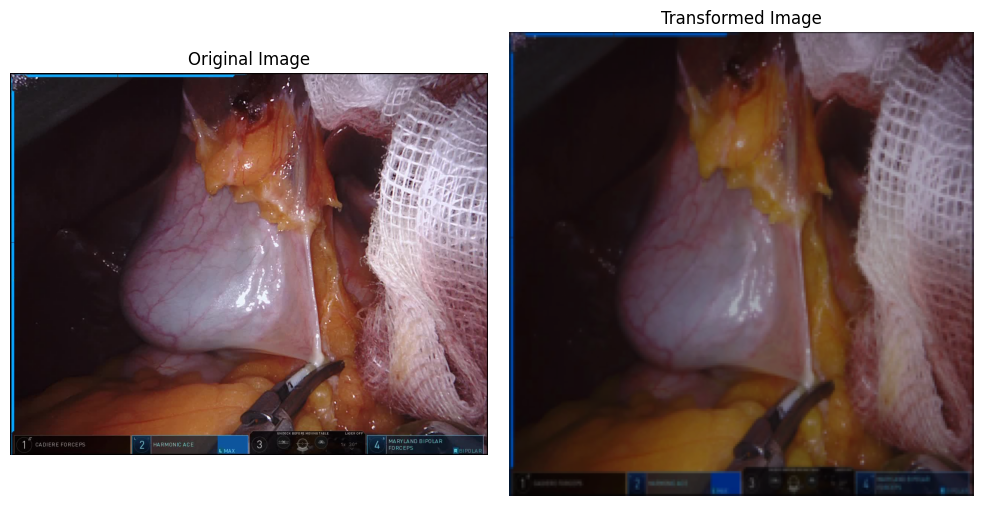

In [5]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
     transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
    transforms.ToTensor(),
    
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Function to unnormalize the tensor image for visualization
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Load image
image_path = '/home/yash/Desktop/project/new dataset/train1/Liver/R074_ch1_video_01_00-07-20-03.jpg'  # Replace with your image path
original_image = Image.open(image_path).convert('RGB')

# Apply transform
transformed_tensor = transform(original_image)

# Unnormalize for displaying
unnormalized_tensor = unnormalize(transformed_tensor.clone(), [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
unnormalized_image = np.transpose(unnormalized_tensor.numpy(), (1, 2, 0))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Transformed image (after resize and normalization -> unnormalized for display)
axs[1].imshow(unnormalized_image)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
from tqdm import tqdm

# ✅ Dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, annotation_file, label_map, transform=None):
        self.image_dir = image_dir
        self.data = pd.read_csv(annotation_file)
        self.transform = transform
        self.label_map = label_map  

        # Fix filename paths and filter missing images
        self.data["filename"] = self.data["filename"].apply(lambda x: os.path.basename(str(x)))
        self.data = self.data[self.data["filename"].apply(lambda x: os.path.exists(os.path.join(self.image_dir, x)))]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.image_dir, row["filename"])

        image = Image.open(img_path).convert("RGB")

        labels = row["labels"].split(",")
        label_tensor = torch.zeros(len(self.label_map))
        for label in labels:
            if label in self.label_map:
                label_tensor[self.label_map[label]] = 1

        if self.transform:
            image = self.transform(image)

        return image, label_tensor

# ✅ Validation dataset info
val_datasets = [
    ("/home/yash/Desktop/project/val1", "/home/yash/Desktop/project/cdv/vall1.csv"),
    ("/home/yash/Desktop/project/val2", "/home/yash/Desktop/project/cdv/vall2.csv"),
    ("/home/yash/Desktop/project/val3", "/home/yash/Desktop/project/cdv/vall3.csv"),
]

# ✅ Rebuild label map (from synthetic training CSVs)
train_annotations = [
    "/home/yash/Desktop/project/cdv/trrain1.csv",
    "/home/yash/Desktop/project/cdv/trrain2.csv",
    "/home/yash/Desktop/project/cdv/trrain3.csv"
]

all_labels = set()
for csv_file in train_annotations:
    train_data = pd.read_csv(csv_file)
    for label_list in train_data["labels"].dropna():
        all_labels.update(label.strip() for label in label_list.split(","))

label_map = {label: idx for idx, label in enumerate(sorted(all_labels))}
num_classes = len(label_map)

# ✅ Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ✅ Load validation datasets
datasets = [
    CustomDataset(img_dir, csv_file, label_map, transform)
    for img_dir, csv_file in val_datasets
]
combined_val_dataset = ConcatDataset(datasets)
val_loader = DataLoader(combined_val_dataset, batch_size=32, shuffle=False, num_workers=2)

# ✅ Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("/home/yash/Desktop/project/resnet_finetuned_real.pth", map_location=device))
model = model.to(device)
model.eval()

# ✅ Accuracy evaluation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(val_loader, desc="🔍 Evaluating", unit="batch"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = (torch.sigmoid(outputs) > 0.5).float()  # Threshold for multi-label

        correct += (preds == labels).sum().item()
        total += labels.numel()

accuracy = 100 * correct / total
print(f"\n✅ Model Accuracy on Validation Set: {accuracy:.2f}%")


/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
🔍 Evaluating: 100%|██████████| 107/107 [00:30<00:00,  3.46batch/s]


✅ Model Accuracy on Validation Set: 98.82%


🔥 Using device: cuda


/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


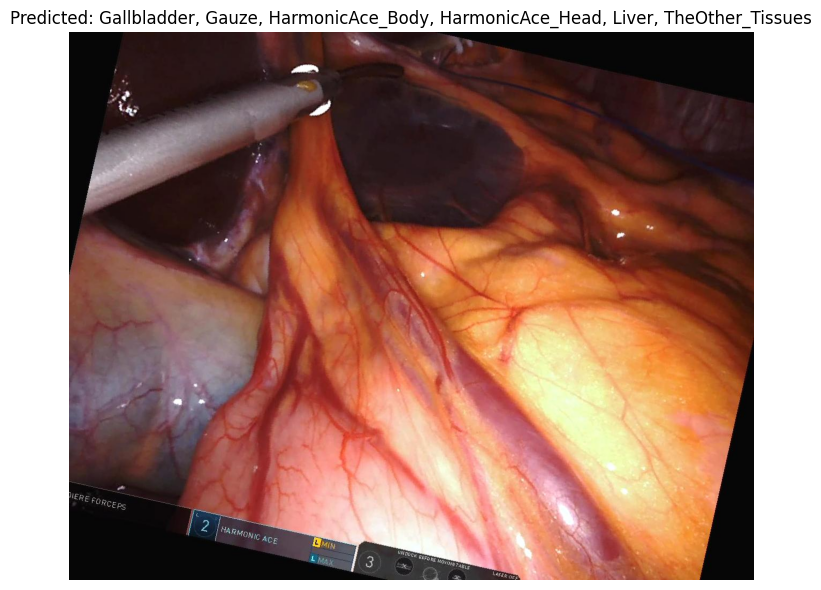


🔍 Prediction Probabilities:
CadiereForceps_Body: 0.00
CadiereForceps_Head: 0.01
CadiereForceps_Wrist: 0.00
CurvedAtraumaticGrasper_Body: 0.04
CurvedAtraumaticGrasper_Head: 0.01
DrainTube: 0.00
Endotip: 0.00
Gallbladder: 0.95
Gauze: 0.98
HarmonicAce_Body: 0.95
HarmonicAce_Head: 0.88
Liver: 0.99
MarylandBipolarForceps_Body: 0.00
MarylandBipolarForceps_Head: 0.28
MarylandBipolarForceps_Wrist: 0.01
MediumLargeClipApplier_Body: 0.00
MediumLargeClipApplier_Head: 0.00
MediumLargeClipApplier_Wrist: 0.00
Needle: 0.00
Pancreas: 0.01
SmallClipApplier_Body: 0.00
SmallClipApplier_Head: 0.00
SmallClipApplier_Wrist: 0.00
Specimenbag: 0.07
Spleen: 0.00
Stapler_Body: 0.00
Stapler_Head: 0.00
Stomach: 0.08
SuctionIrrigation: 0.00
TheOther_Instruments: 0.01
TheOther_Tissues: 1.00

✅ Final Predicted Labels (threshold=0.5): Gallbladder, Gauze, HarmonicAce_Body, HarmonicAce_Head, Liver, TheOther_Tissues


In [12]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Configurable Paths
model_path = "/home/yash/Desktop/project/resnet_finetuned_real.pth"
image_path = "/home/yash/Desktop/project/new dataset/ft1/aug_30_R084_ch1_video_01_00-06-33-08.jpg"
real_csv_paths = [
    "/home/yash/Desktop/project/cdv/trrain1.csv",
    "/home/yash/Desktop/project/cdv/trrain2.csv",
    "/home/yash/Desktop/project/cdv/trrain3.csv"
]

# ✅ Step 1: Load Label Map from All CSVs
label_set = set()
for csv_path in real_csv_paths:
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        for label_str in df["labels"].dropna():
            label_set.update(label_str.split(","))
    else:
        print(f"⚠️ CSV file not found: {csv_path}")

label_list = sorted(label_set)
label_map = {idx: label for idx, label in enumerate(label_list)}

# ✅ Step 2: Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Using device: {device}")

num_classes = len(label_map)
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ✅ Step 3: Transform Image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Step 4: Load Image
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found: {image_path}")

image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# ✅ Step 5: Inference
with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.sigmoid(output).cpu().numpy()[0]
    threshold = 0.5
    predicted_labels = [label_map[i] for i, prob in enumerate(probabilities) if prob >= threshold]

# ✅ Step 6: Display Image & Results
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted: {', '.join(predicted_labels) if predicted_labels else 'No Labels'}")
plt.tight_layout()
plt.show()

# ✅ Print Labels and Scores
print("\n🔍 Prediction Probabilities:")
for i, prob in enumerate(probabilities):
    print(f"{label_map[i]}: {prob:.2f}")

print(f"\n✅ Final Predicted Labels (threshold={threshold}): {', '.join(predicted_labels) if predicted_labels else 'None'}")


🔥 Using device: cuda


/tmp/ipykernel_3697/163466177.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_rel_path = row[0]
/tmp/ipykernel_3697/163466177.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = row[1].split(",") if isinstance(row[1], str) else []
/tmp/ipykernel_3697/163466177.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_rel_path = row[0]
/tmp/ipykernel_3697/163466177.py:52: FutureWarning: Series.__getitem__ treating k

✅ Loaded 10107 samples


/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yash/miniconda3/envs/yash/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



📊 Evaluation Metrics (Threshold = 0.50)
Accuracy : 0.7888592064905511
Precision: 0.9735254119967497
Recall   : 0.9812605201275316
F1 Score : 0.9766413863620013

🔍 Per-Label F1 Scores:
CadiereForceps_Body      : 0.97
CadiereForceps_Head      : 0.98
CadiereForceps_Wrist     : 0.98
CurvedAtraumaticGrasper_Body: 0.98
CurvedAtraumaticGrasper_Head: 0.97
DrainTube                : 0.98
Endotip                  : 0.99
Gallbladder              : 0.98
Gauze                    : 0.99
HarmonicAce_Body         : 0.98
HarmonicAce_Head         : 0.98
Liver                    : 0.99
MarylandBipolarForceps_Body: 0.96
MarylandBipolarForceps_Head: 0.99
MarylandBipolarForceps_Wrist: 0.98
MediumLargeClipApplier_Body: 0.93
MediumLargeClipApplier_Head: 0.98
MediumLargeClipApplier_Wrist: 0.88
Needle                   : 0.99
Pancreas                 : 0.97
SmallClipApplier_Body    : 0.99
SmallClipApplier_Head    : 1.00
SmallClipApplier_Wrist   : 0.98
Specimenbag              : 0.99
Spleen                   : 

ValueError: Unknown format code 'd' for object of type 'float'

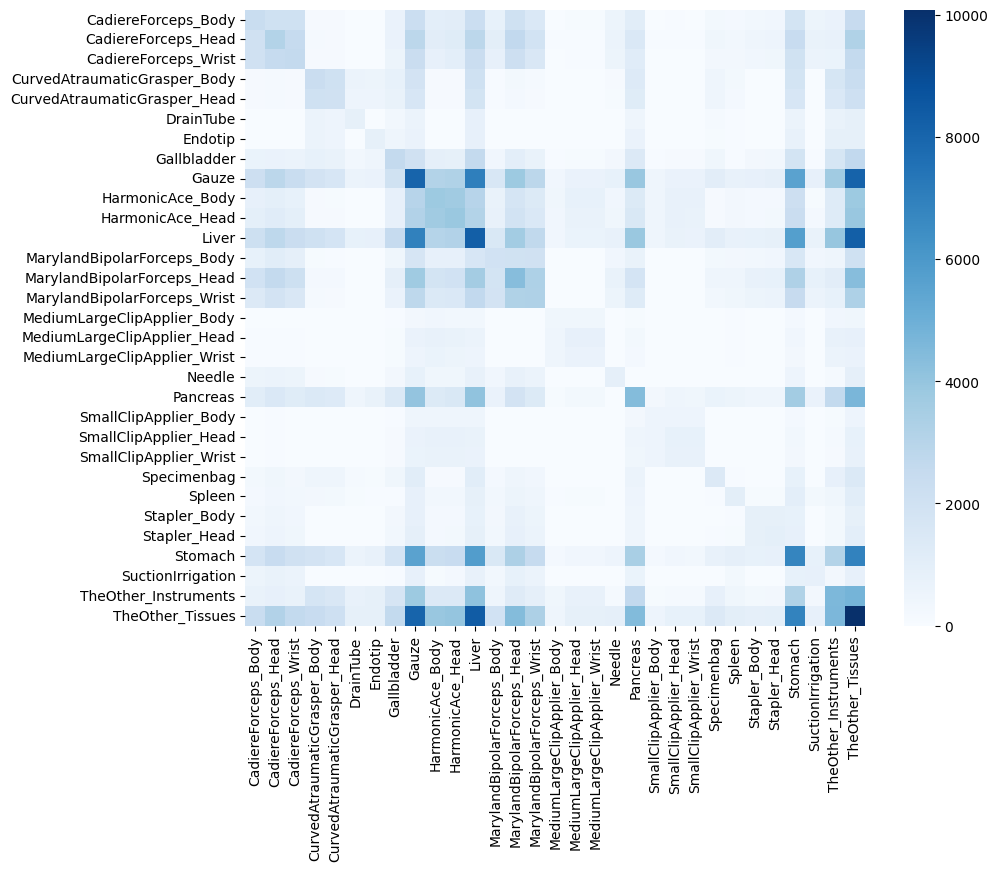

In [8]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# CONFIGURATION
# ================================
REAL_DATASETS = [
    ("/home/yash/Desktop/project/train1", "/home/yash/Desktop/project/cdv/trrain1.csv"),
    ("/home/yash/Desktop/project/train2", "/home/yash/Desktop/project/cdv/trrain2.csv"),
    ("/home/yash/Desktop/project/train3", "/home/yash/Desktop/project/cdv/trrain3.csv")
]
MODEL_PATH = "/home/yash/Desktop/project/resnet_finetuned_real.pth"
BATCH_SIZE = 32
THRESHOLD = 0.5

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Using device: {DEVICE}")

# ================================
# DATASET CLASS
# ================================
class MultiLabelCSVDataset(Dataset):
    def __init__(self, datasets, transform=None):
        self.data = []
        self.transform = transform
        self.label_set = set()

        # Iterate over each dataset (image directory and CSV file)
        for img_dir, csv_path in datasets:
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                for _, row in df.iterrows():
                    img_rel_path = row[0]

                    # Skip 'real' part of the directory in the path
                    img_rel_path = img_rel_path.replace("real/", "")  # Skip 'real' directory part

                    img_path = os.path.join(img_dir, img_rel_path)
                    if not os.path.isfile(img_path):
                        print(f"❌ Image not found: {img_path}")
                        continue
                    labels = row[1].split(",") if isinstance(row[1], str) else []
                    self.data.append((img_path, labels))
                    self.label_set.update(labels)
            else:
                print(f"⚠️ CSV file not found: {csv_path}")

        self.label_list = sorted(list(self.label_set))
        self.label_map = {label: idx for idx, label in enumerate(self.label_list)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, labels = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_tensor = torch.zeros(len(self.label_map), dtype=torch.float32)
        for label in labels:
            if label in self.label_map:
                label_tensor[self.label_map[label]] = 1.0
        return image, label_tensor


# ================================
# TRANSFORM
# ================================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ================================
# LOAD DATA
# ================================
dataset = MultiLabelCSVDataset(REAL_DATASETS, transform=transform)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Loaded {len(dataset)} samples")

# ================================
# LOAD MODEL
# ================================
num_classes = len(dataset.label_map)
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# ================================
# EVALUATE FUNCTION
# ================================
def evaluate(model, dataloader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy()
            all_preds.append(preds)
            all_labels.append(labels.cpu().numpy())
    if all_preds and all_labels:
        return np.vstack(all_labels), np.vstack(all_preds)
    else:
        return np.array([]), np.array([])

# ================================
# EVALUATE MODEL
# ================================
y_true, y_pred = evaluate(model, dataloader)

if y_true.size == 0 or y_pred.size == 0:
    print("❌ Evaluation failed. No data was processed.")
else:
    y_pred_bin = (y_pred >= THRESHOLD).astype(int)

    print("\n📊 Evaluation Metrics (Threshold = {:.2f})".format(THRESHOLD))
    print("Accuracy :", accuracy_score(y_true, y_pred_bin))
    print("Precision:", precision_score(y_true, y_pred_bin, average='macro', zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred_bin, average='macro', zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred_bin, average='macro', zero_division=0))

    # Optionally: Print per-label scores
    print("\n🔍 Per-Label F1 Scores:")
    for i, label in enumerate(dataset.label_map.keys()):
        f1 = f1_score(y_true[:, i], y_pred_bin[:, i], zero_division=0)
        print(f"{label:25s}: {f1:.2f}")

    # ================================
    # Confusion Matrix & Heatmap
    # ================================
    # We need the confusion matrix for multi-label classification.
    cm = np.dot(y_true.T, y_pred_bin)  # Generate confusion matrix for multi-label classification

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.label_list, yticklabels=dataset.label_list)
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import os

# === CONFIG ===
model_path = '/home/yash/Desktop/project/resnet_finetuned_real.pth'
csv_paths = [  # ✅ Add your CSV paths here
    '/home/yash/Desktop/project/cdv/trrain1.csv',
    '/home/yash/Desktop/project/cdv/trrain2.csv',
    '/home/yash/Desktop/project/cdv/trrain3.csv'
]
batch_size = 32
num_classes = 31
device = 'cuda' if torch.cuda.is_available() else 'cpu'
show_all_classes = False  # True = plot all class ROC curves
class_to_plot = 0         # If False, this class index will be plotted

# === TRANSFORMS ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === DATASET CLASS ===
class CustomDataset(Dataset):
    def __init__(self, image_dirs, annotation_file, label_map, transform=None):
        self.image_dirs = image_dirs  # List of directories where images are located
        self.data = pd.read_csv(annotation_file)
        self.transform = transform
        self.label_map = label_map

        # Ensure filenames are correctly processed (remove base folder name)
        self.data["filename"] = self.data["filename"].apply(lambda x: os.path.basename(str(x)))
        self.data = self.data[self.data["filename"].apply(lambda x: any(os.path.exists(os.path.join(image_dir, x)) for image_dir in self.image_dirs))]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_name = row["filename"]

        # Find the image in one of the directories
        full_path = None
        for image_dir in self.image_dirs:
            potential_path = os.path.join(image_dir, img_name)
            if os.path.exists(potential_path):
                full_path = potential_path
                break
        
        if full_path is None:
            raise FileNotFoundError(f"Image {img_name} not found in any of the provided directories.")

        image = Image.open(full_path).convert("RGB")

        labels = row["labels"].split(",")
        label_tensor = torch.zeros(len(self.label_map))
        for label in labels:
            if label in self.label_map:
                label_tensor[self.label_map[label]] = 1

        if self.transform:
            image = self.transform(image)

        return image, label_tensor

# === LOAD MODEL ===
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# === LABEL MAP ===
all_labels = set()
for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    for label_str in df['labels']:
        labels = label_str.split(',')
        all_labels.update(labels)

label_map = {label: i for i, label in enumerate(sorted(all_labels))}

# === IMAGE DIRECTORIES ===
# Manually add the directories where your images are stored
image_dirs = [
    '/home/yash/Desktop/project/train1',
    '/home/yash/Desktop/project/train2',
    '/home/yash/Desktop/project/train3'
]

# === PROCESS EACH CSV ===
for csv_path in csv_paths:
    print(f"\n===== Processing: {os.path.basename(csv_path)} =====")

    # Load dataset
    test_dataset = CustomDataset(image_dirs=image_dirs, annotation_file=csv_path, label_map=label_map, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Inference
    all_probs, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Debugging: print the batch shape to ensure data is being loaded
            print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")

            outputs = torch.sigmoid(model(images)).cpu()
            all_probs.append(outputs)
            all_labels.append(labels)

    # Ensure there are probs and labels before concatenating
    if all_probs and all_labels:
        probs = torch.cat(all_probs, dim=0).numpy()
        labels = torch.cat(all_labels, dim=0).numpy()

        # ROC and AUC
        if show_all_classes:
            plt.figure(figsize=(12, 10))
            for i in range(num_classes):
                try:
                    fpr, tpr, _ = roc_curve(labels[:, i], probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    print(f'Class {i}: AUC = {roc_auc:.4f}')
                    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
                except ValueError:
                    print(f'Skipping Class {i} (insufficient data)')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {os.path.basename(csv_path)}')
            plt.legend(loc='lower right', fontsize='small')
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            try:
                fpr, tpr, _ = roc_curve(labels[:, class_to_plot], probs[:, class_to_plot])
                roc_auc = auc(fpr, tpr)
                print(f'Class {class_to_plot} - AUC: {roc_auc:.4f}')

                plt.figure(figsize=(7, 5))
                plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
                plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - Class {class_to_plot} ({os.path.basename(csv_path)})')
                plt.legend(loc='lower right')
                plt.grid(alpha=0.3)
                plt.tight_layout()
                plt.show()
            except ValueError:
                print(f"Class {class_to_plot} in {csv_path} has insufficient positive/negative samples.")
    else:
        print(f"No valid predictions or labels found for {csv_path}.")



===== Processing: trrain1.csv =====
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32, 31])
Batch shape: to

KeyboardInterrupt: 

Evaluating: 100%|██████████| 316/316 [02:11<00:00,  2.41it/s]


Class 0: AUC = 0.9991
Class 1: AUC = 0.9989
Class 2: AUC = 0.9991
Class 3: AUC = 0.9985
Class 4: AUC = 0.9987
Class 5: AUC = 0.9990
Class 6: AUC = 0.9998
Class 7: AUC = 0.9981
Class 8: AUC = 0.9984
Class 9: AUC = 0.9983
Class 10: AUC = 0.9986
Class 11: AUC = 0.9951
Class 12: AUC = 0.9996
Class 13: AUC = 0.9997
Class 14: AUC = 0.9993
Class 15: AUC = 1.0000
Class 16: AUC = 0.9986
Class 17: AUC = 0.9999
Class 18: AUC = 0.9984
Class 19: AUC = 0.9949
Class 20: AUC = 1.0000
Class 21: AUC = 1.0000
Class 22: AUC = 0.9999
Class 23: AUC = 0.9997
Class 24: AUC = 0.9984
Class 25: AUC = 0.9998
Class 26: AUC = 0.9996
Class 27: AUC = 0.9977
Class 28: AUC = 0.9998
Class 29: AUC = 0.9968
Class 30: AUC = 1.0000


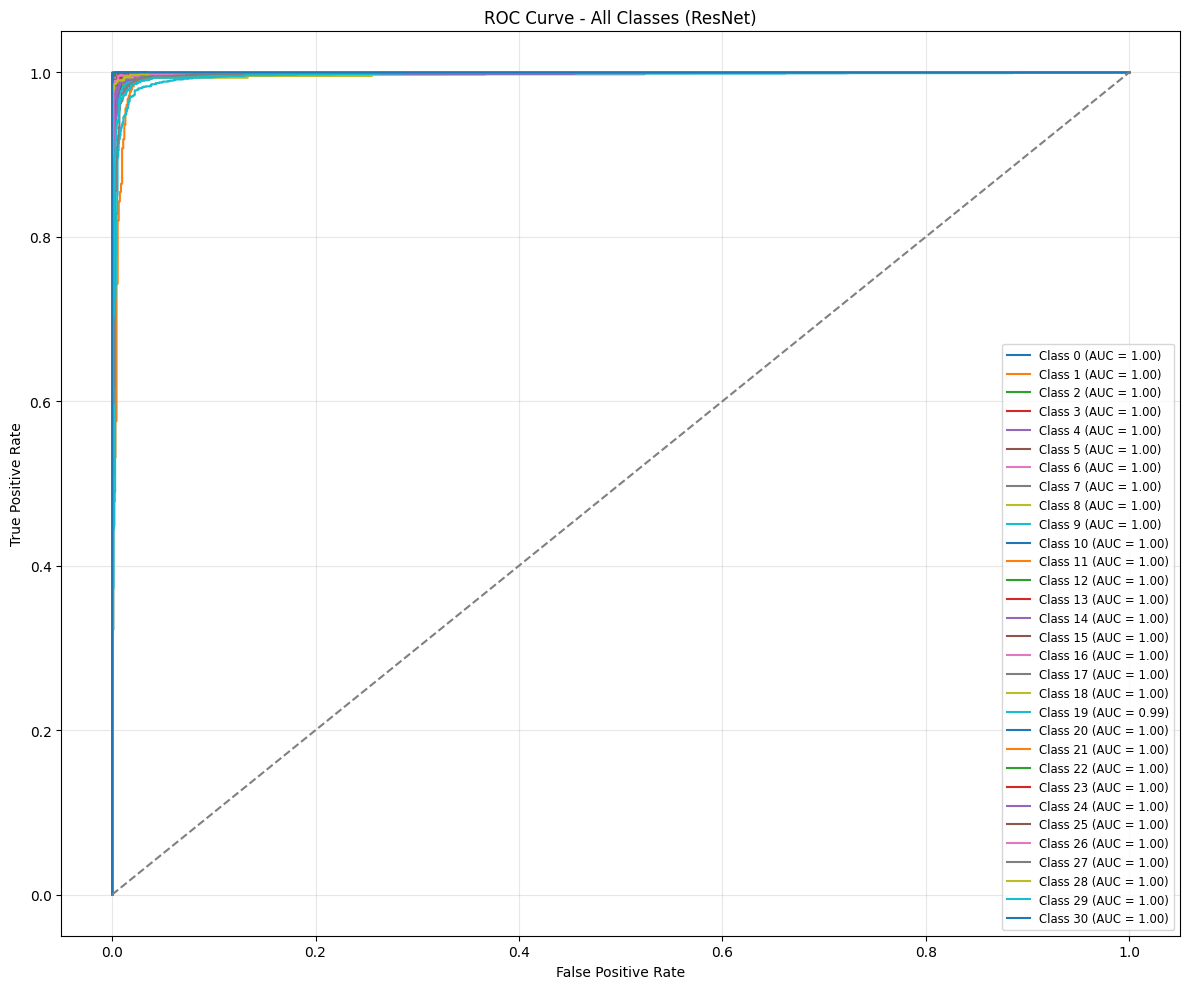

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# === CONFIG ===
model_path = '/home/yash/Desktop/project/resnet_finetuned_real.pth'
csv_paths = [
    '/home/yash/Desktop/project/cdv/trrain1.csv',
    '/home/yash/Desktop/project/cdv/trrain2.csv',
    '/home/yash/Desktop/project/cdv/trrain3.csv'
]
image_dirs = [
    '/home/yash/Desktop/project/train1',
    '/home/yash/Desktop/project/train2',
    '/home/yash/Desktop/project/train3'
]
batch_size = 32
num_classes = 31
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# === TRANSFORMS ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === DATASET CLASS ===
class CustomDataset(Dataset):
    def __init__(self, image_dirs, annotation_file, label_map, transform=None):
        self.image_dirs = image_dirs
        self.data = pd.read_csv(annotation_file)
        self.transform = transform
        self.label_map = label_map

        self.data["filename"] = self.data["filename"].apply(lambda x: os.path.basename(str(x)))
        self.data = self.data[self.data["filename"].apply(
            lambda x: any(os.path.exists(os.path.join(image_dir, x)) for image_dir in self.image_dirs)
        )]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_name = row["filename"]

        full_path = None
        for image_dir in self.image_dirs:
            potential_path = os.path.join(image_dir, img_name)
            if os.path.exists(potential_path):
                full_path = potential_path
                break

        if full_path is None:
            raise FileNotFoundError(f"Image {img_name} not found.")

        image = Image.open(full_path).convert("RGB")
        labels = row["labels"].split(",")
        label_tensor = torch.zeros(len(self.label_map))
        for label in labels:
            if label in self.label_map:
                label_tensor[self.label_map[label]] = 1

        if self.transform:
            image = self.transform(image)

        return image, label_tensor

# === BUILD LABEL MAP ===
all_labels = set()
for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    for label_str in df['labels']:
        labels = label_str.split(',')
        all_labels.update(labels)
label_map = {label: i for i, label in enumerate(sorted(all_labels))}

# === MERGE ALL DATASETS ===
merged_df = pd.concat([pd.read_csv(p) for p in csv_paths])
merged_csv_path = '/tmp/merged_eval.csv'
merged_df.to_csv(merged_csv_path, index=False)

# === LOAD DATASET ===
dataset = CustomDataset(image_dirs=image_dirs, annotation_file=merged_csv_path, label_map=label_map, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# === LOAD MODEL ===
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# === INFERENCE ===
all_probs, all_labels = [], []
with torch.no_grad():
    for images, labels in tqdm(dataloader, desc="Evaluating"):
        images = images.to(device)
        outputs = torch.sigmoid(model(images)).cpu()
        all_probs.append(outputs)
        all_labels.append(labels)

# === EVALUATE AND PLOT ROC CURVES ===
if all_probs and all_labels:
    probs = torch.cat(all_probs).numpy()
    labels = torch.cat(all_labels).numpy()

    plt.figure(figsize=(12, 10))
    for i in range(num_classes):
        try:
            fpr, tpr, _ = roc_curve(labels[:, i], probs[:, i])
            roc_auc = auc(fpr, tpr)
            print(f'Class {i}: AUC = {roc_auc:.4f}')
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        except ValueError:
            print(f'Skipping Class {i} (insufficient data)')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - All Classes (ResNet)')
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No predictions or labels found.")
